In [29]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pickle
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import torch
from torch import nn, optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder

from scripts.cat_vs_dog_helpers import evalf, plot_results
from scripts.cat_vs_dog_test_helpers import *

In [2]:
dataset = ImageFolder("catvsdog_test/")

# Load model

Models:
- Alexnet (227 X 227)
- VGG19BN (224 X 224)
- InceptionV3 (229 X 229)
- DenseNet (224 X 224)
- Resnet (224 X 224)
- MobileNetV3 (224 X 224)

In [8]:
def test_model(file_name, input_size):
    model = torch.load(file_name)
    device = "cuda" if torch.cuda.is_available() else "cpu"

    test_dataset = CatvsDogDataset(dataset, input_size)
    test_loader = DataLoader(test_dataset)
    
    eval_result = evalf(model, test_loader, device)
    
    plot_results(eval_result)
    
    return eval_result

## Alexnet

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [01:31<00:00, 25.68it/s]


Test Accuracy: 78.60504913330078


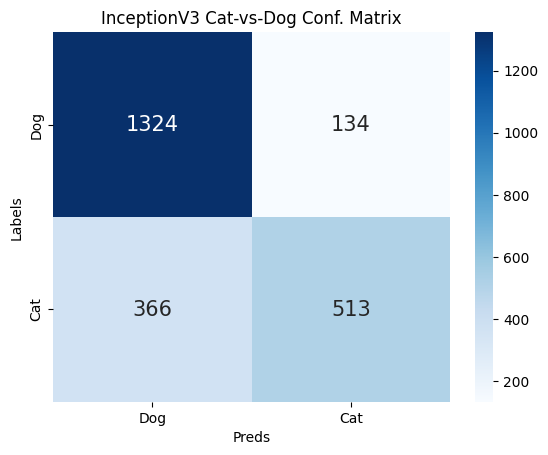

In [15]:
alexnet_results = test_model("alexnet_model.pt", 227)

## VGG19_BN

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [01:38<00:00, 23.63it/s]


Test Accuracy: 82.28498077392578


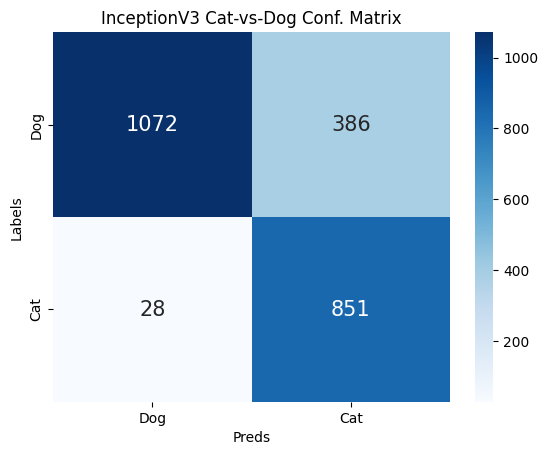

In [10]:
vgg19_bn_results = test_model("vgg19_bn_model.pt", 224)

## Inception_V3

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [01:42<00:00, 22.87it/s]


Test Accuracy: 78.04877471923828


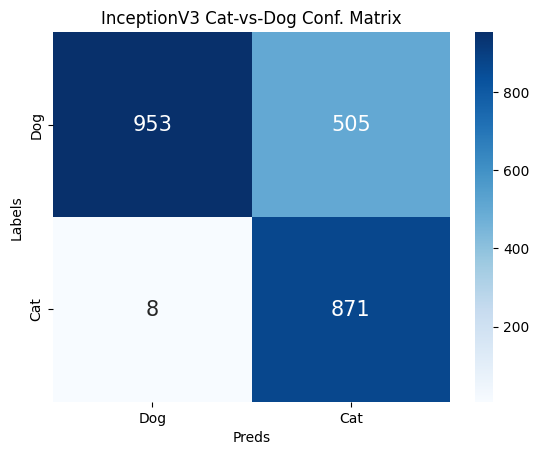

In [11]:
inception_v3_results = test_model("inception_v3_model.pt", 229)

## DenseNet

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [02:38<00:00, 14.79it/s]


Test Accuracy: 88.44672393798828


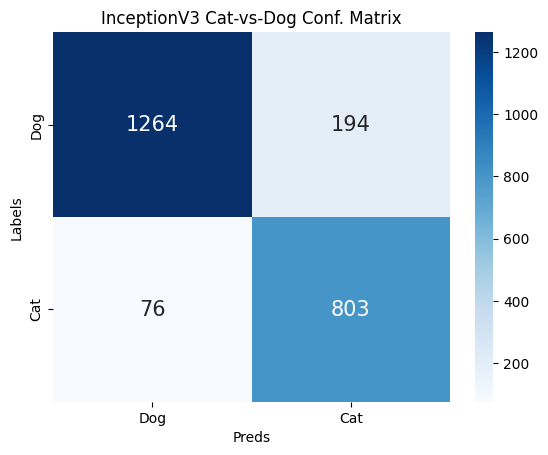

In [12]:
densenet161_results = test_model("densenet161_model.pt", 224)

## Resnet

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [01:34<00:00, 24.62it/s]


Test Accuracy: 59.34959030151367


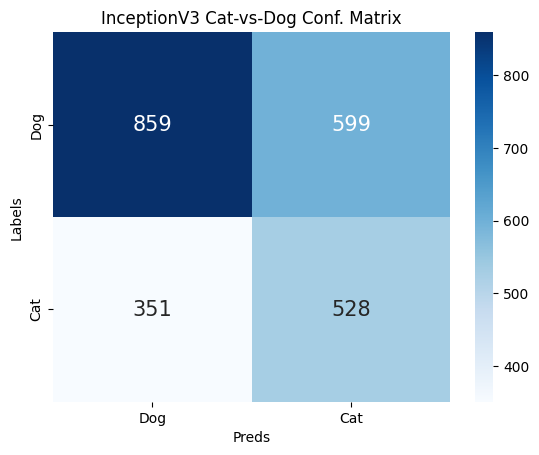

In [13]:
resnet50_results = test_model("resnet50_model.pt", 224)

## MobileNetV3

100%|██████████████████████████████████████████████████████████████████████████████| 2337/2337 [01:37<00:00, 23.98it/s]


Test Accuracy: 76.8934555053711


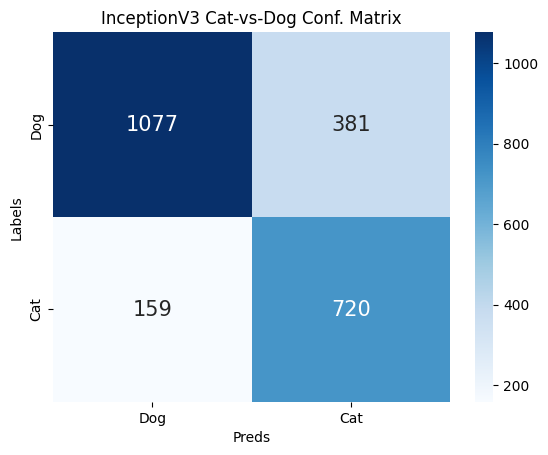

In [14]:
mobilenet_v3_large_results = test_model("mobilenet_v3_large_model.pt", 224)

# Results

In [27]:
file_names = ['alexnet_results.pt',
             'densenet161_results.pt',
             'inception_v3_results.pt',
             'mobilenet_v3_large_results.pt',
             'resnet50_results.pt',
             'vgg19_bn_results.pt']

model_results = [alexnet_results,
                 densenet161_results,
                 inception_v3_results,
                 mobilenet_v3_large_results,
                 resnet50_results,
                 vgg19_bn_results]

model_names = [f.split("_results")[0] for f in file_names]

model_test_accs = [r["accuracy"] for r in model_results]
model_preds = [r["model_preds"] for r in model_results]

true_labels = model_results[0]["true_labels"]

## Test Accuracies

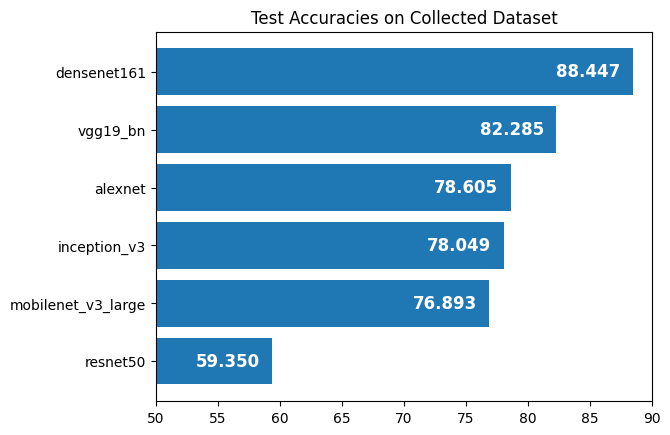

In [45]:
plt.figure()

test_acc_dict = {model_names[i]:model_test_accs[i] for i in range(len(model_test_accs))}
keys = list(test_acc_dict.keys())
values = list(test_acc_dict.values())


sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

plt.barh(list(sorted_dict.keys()), list(sorted_dict.values()))
plt.xlim(50,90)

plt.title("Test Accuracies on Collected Dataset")

for idx, value in enumerate(sorted_dict.values()):
    plt.text(value-1, idx, f"{value:.3f}", weight="bold", color="white", fontsize=12, va="center", ha="right")

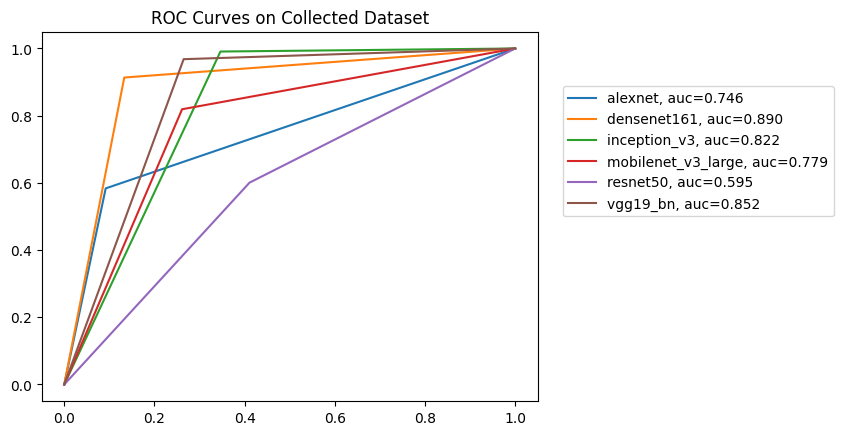

In [40]:
for idx, pred in enumerate(model_preds):
    fpr, tpr, _ = roc_curve(true_labels,  pred)
    auc = roc_auc_score(true_labels,  pred)
    plt.plot(fpr, tpr, label=f"{model_names[idx]}, auc={auc:.3f}")
    
plt.title("ROC Curves on Collected Dataset")
plt.legend(loc=(1.05,0.5))
plt.show()

In [28]:
for idx, m in enumerate(model_names):
    print(f"{m.upper()}:")
    print(classification_report(true_labels, model_preds[idx]))
    print("-"*53)

ALEXNET:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1458
           1       0.79      0.58      0.67       879

    accuracy                           0.79      2337
   macro avg       0.79      0.75      0.76      2337
weighted avg       0.79      0.79      0.78      2337

-----------------------------------------------------
DENSENET161:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1458
           1       0.81      0.91      0.86       879

    accuracy                           0.88      2337
   macro avg       0.87      0.89      0.88      2337
weighted avg       0.89      0.88      0.89      2337

-----------------------------------------------------
INCEPTION_V3:
              precision    recall  f1-score   support

           0       0.99      0.65      0.79      1458
           1       0.63      0.99      0.77       879

    accuracy                          